In [1]:
%%capture
%pip install -U 'rockfish[labs]' -f 'https://docs142.rockfish.ai/packages/index.html'

In [2]:
import rockfish as rf
import rockfish.labs as rl

## Preprocessing Examples
### Example 1. Downsampling a tabular dataset

Randomly select 10 records

In [3]:
# download our example of tabular data: fall_detection.csv
!wget --no-clobber https://docs142.rockfish.ai/tutorials/fall_detection.csv
# original source data
og_tab_dataset = rf.Dataset.from_csv("tabular", "fall_detection.csv")
og_tab_dataset.to_pandas()

--2024-08-07 09:41:32--  https://docs142.rockfish.ai/tutorials/fall_detection.csv
Resolving docs142.rockfish.ai (docs142.rockfish.ai)... 18.154.206.84, 18.154.206.70, 18.154.206.48, ...
Connecting to docs142.rockfish.ai (docs142.rockfish.ai)|18.154.206.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 391361 (382K) [text/csv]
Saving to: ‘fall_detection.csv’

fall_detection.csv  100%[===================>] 382.19K  --.-KB/s    in 0.05s   

2024-08-07 09:41:33 (7.13 MB/s) - ‘fall_detection.csv’ saved [391361/391361]



,Age range of patient,Sex,Involvement of medication associated with fall risk,Whether a fall prevention protocol was implemented,Reason for incident,Whether a restraint prescription was given,Whether a physical therapy prescription was given,BBS Score,Body Temperature,Heart Rate,...,Chronic Heart Failure,Stroke,Frozen shoulder,Osteoarthritis of hip,Cerebellar Ataxia,Hemiparesis,GB Syndrome,Fall risk level,Ischemic Heart Disease,Cervical sopondylitis
0,60<70,M,Yes,Yes,Slip,No,Yes,41,97,80,...,No,No,No,No,No,No,No,High,No,No
1,30<40,F,Yes,Yes,Loss of balance,No,No,41,96,78,...,No,No,No,No,No,No,No,High,No,No
2,60<70,M,Yes,Yes,Mental confusion,No,Yes,43,98,81,...,No,No,No,No,No,No,No,High,No,No
3,80<90,M,Yes,Yes,Mental confusion,No,Yes,40,99,82,...,No,No,No,No,No,No,No,High,No,No
4,60<70,M,Yes,Yes,Loss of balance,No,Yes,40,96,90,...,No,No,No,No,No,No,No,High,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,50<60,M,No,No,Muscle weakness,No,No,44,97,67,...,No,No,No,No,No,No,No,Moderate,No,No
2578,80<90,F,No,No,Hypotension,No,No,43,97,96,...,No,No,No,No,No,No,No,Moderate,No,No
2579,30<40,F,No,No,Muscle weakness,No,No,43,96,76,...,No,No,No,No,No,No,No,Moderate,No,No
2580,60<70,M,No,Yes,Loss of balance,No,No,44,99,101,...,No,No,No,No,No,No,No,Moderate,No,No


In [4]:
query = """SELECT *
    FROM my_table
    ORDER BY RANDOM()
    LIMIT 10
    """

dataset = og_tab_dataset.sync_sql(query) 
dataset.to_pandas()

,Age range of patient,Sex,Involvement of medication associated with fall risk,Whether a fall prevention protocol was implemented,Reason for incident,Whether a restraint prescription was given,Whether a physical therapy prescription was given,BBS Score,Body Temperature,Heart Rate,...,Chronic Heart Failure,Stroke,Frozen shoulder,Osteoarthritis of hip,Cerebellar Ataxia,Hemiparesis,GB Syndrome,Fall risk level,Ischemic Heart Disease,Cervical sopondylitis
0,50<60,F,No,No,Loss of balance,No,No,48,97,70,...,No,No,No,No,No,No,No,Low,No,No
1,70<80,F,Yes,Yes,Muscle weakness,No,Yes,38,97,78,...,No,No,No,No,No,No,No,High,No,No
2,50<60,M,Yes,Yes,Muscle weakness,No,Yes,39,97,100,...,No,No,No,No,No,No,No,High,No,No
3,50<60,F,No,Yes,Hypotension,No,No,44,98,67,...,No,No,No,No,No,No,No,Moderate,No,No
4,50<60,F,Yes,Yes,Mental confusion,No,Yes,40,96,98,...,No,No,No,No,No,No,No,High,No,No
5,60<70,F,Yes,Yes,Mental confusion,No,No,40,98,93,...,No,No,No,No,No,No,No,High,No,No
6,60<70,F,No,No,Loss of balance,No,No,44,95,101,...,No,No,No,No,No,No,No,Moderate,No,No
7,80<90,F,No,Yes,Mental confusion,No,Yes,37,97,96,...,No,No,No,No,No,No,No,High,No,No
8,50<60,F,No,Yes,Mental confusion,No,Yes,40,96,69,...,No,No,No,No,No,No,No,High,No,No
9,1<13,M,No,No,Human error,No,No,37,97,76,...,No,No,No,No,Yes,No,No,High,No,No


### Example 2. Downsampling the timeseries dataset

Randomly select 10 sessions. For finance dataset, the metadata fields are `customer`, `age`, `gender`.

In [5]:
# download our example of timeseries data: finance.csv
!wget --no-clobber https://docs142.rockfish.ai/tutorials/finance.csv
# original source data
og_ts_dataset = rf.Dataset.from_csv("timeseries", "finance.csv")
og_ts_dataset.to_pandas()

--2024-08-07 09:41:33--  https://docs142.rockfish.ai/tutorials/finance.csv
Resolving docs142.rockfish.ai (docs142.rockfish.ai)... 18.154.206.84, 18.154.206.70, 18.154.206.48, ...
Connecting to docs142.rockfish.ai (docs142.rockfish.ai)|18.154.206.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3444556 (3.3M) [text/csv]
Saving to: ‘finance.csv’

finance.csv         100%[===================>]   3.28M  --.-KB/s    in 0.1s    

2024-08-07 09:41:34 (23.8 MB/s) - ‘finance.csv’ saved [3444556/3444556]



,customer,age,gender,merchant,category,amount,fraud,timestamp
0,C1093826151,4,M,M348934600,transportation,4.55,0,2023-01-01
1,C575345520,2,F,M348934600,transportation,76.67,0,2023-01-01
2,C1787537369,2,M,M1823072687,transportation,48.02,0,2023-01-01
3,C1732307957,5,F,M348934600,transportation,55.06,0,2023-01-01
4,C842799656,1,F,M348934600,transportation,25.62,0,2023-01-01
...,...,...,...,...,...,...,...,...
49995,C1971105040,3,M,M348934600,transportation,67.91,0,2023-01-20
49996,C51444479,3,M,M348934600,transportation,32.27,0,2023-01-20
49997,C1096642744,5,M,M1535107174,wellnessandbeauty,149.70,0,2023-01-20
49998,C1166683343,2,F,M1823072687,transportation,24.78,0,2023-01-20


In [ ]:
query = """SELECT my_table.*
    FROM my_table
    JOIN (
        SELECT DISTINCT customer, age, gender
        FROM my_table
        ORDER BY RANDOM()
        LIMIT <k>
    ) select_sessions
    ON my_table.customer = select_sessions.customer
    AND my_table.age = select_sessions.age
    AND my_table.gender = select_sessions.gender
"""
dataset = og_ts_dataset.sync_sql(query) 
dataset.to_pandas()

## Evaluation examples
### Example of visualization on the conditional dataset(s)

visualize the finance dataset when `age` is in the group of "1", "2" or "3"

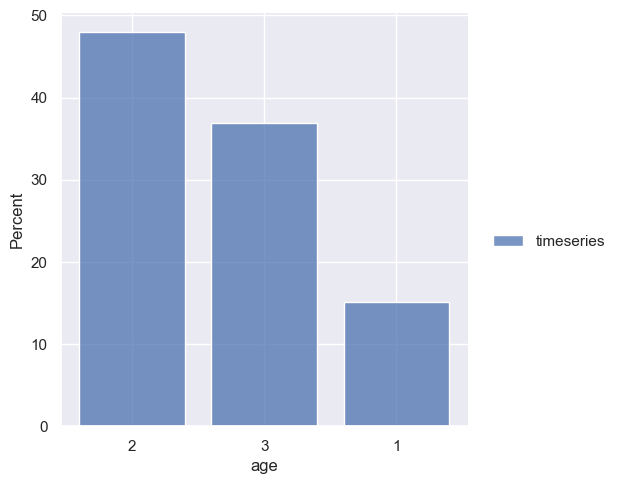

In [6]:
query = """SELECT *
    FROM my_table
    WHERE age IN ('1', '2', '3')"""

# Argument of datasets should be a list of one or more datasets
rl.vis.custom_plot([og_ts_dataset], query, rl.vis.plot_bar, "age");

### Example of visualization on the aggregated dataset(s)

Count the number of unique values per sessions for high cardinality field. 

Below is the example on the finance dataset.

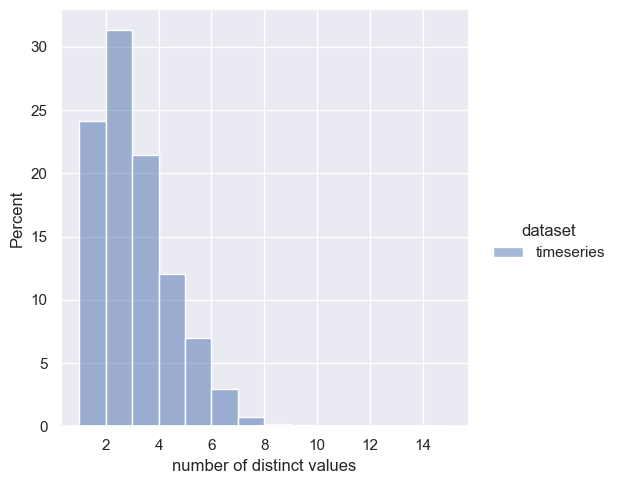

In [7]:
query = """SELECT COUNT(DISTINCT merchant) AS "number of distinct values"
    FROM my_table
    GROUP BY customer, age, gender"""

# Argument of datasets should be a list of one or more datasets
rl.vis.custom_plot([og_ts_dataset], query, rl.vis.plot_hist, "number of distinct values", binwidth = 1);